In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/Ryan_Johnson/Desktop/Python Programming'

In [3]:
movies = pd.read_csv('Movie-Ratings.csv')

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'BudgetMillions', 'Year']

In [7]:
movies.columns

Index(['Film', 'Genre', 'CriticRatings', 'AudienceRatings', 'BudgetMillions',
       'Year'],
      dtype='object')

In [8]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe()

,CriticRatings,AudienceRatings,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
movies.Film = movies.Film.astype('category')

In [12]:
movies.Genre = movies.Genre.astype('category')

In [13]:
movies.Year = movies.Year.astype('category')

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [15]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [16]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [17]:
movies.describe()

,CriticRatings,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
###JointPlots

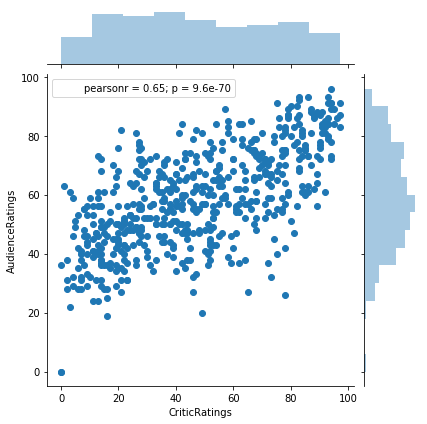

In [20]:
j = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings')

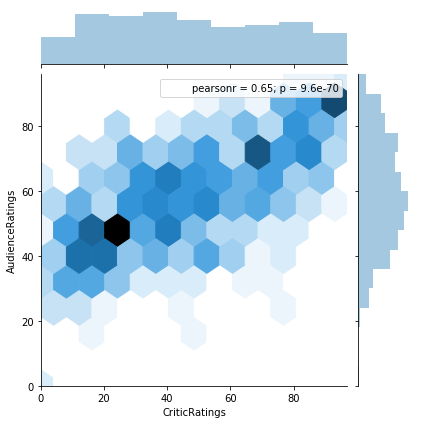

In [21]:
chart1 = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings', kind = 'hex')

In [22]:
#<<<Chart #1

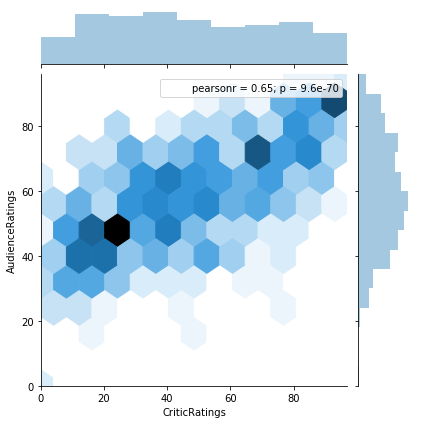

In [23]:
chart2 = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings', kind = 'hex',)

In [24]:
##Histograms

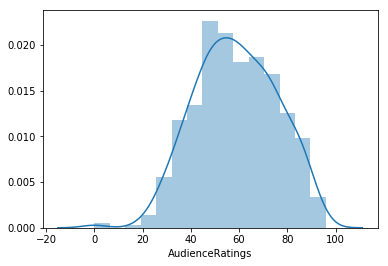

In [25]:
#<<Chart 2
m1 = sns.distplot(movies.AudienceRatings, bins = 15)

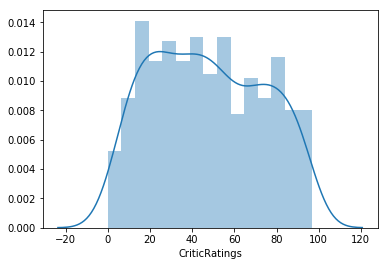

In [26]:
#<<Chart 3
m2 = sns.distplot(movies.CriticRatings, bins= 15)

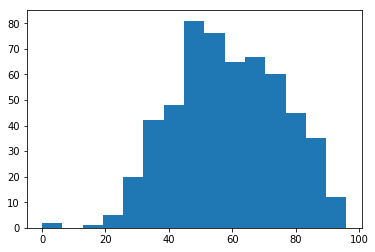

In [27]:
n1 = plt.hist(movies.AudienceRatings, bins=15)

In [28]:
#Stacked Histogram

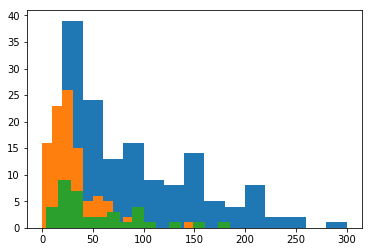

In [29]:

plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
# plt.hist(movies.BudgetMillions)
plt.show()

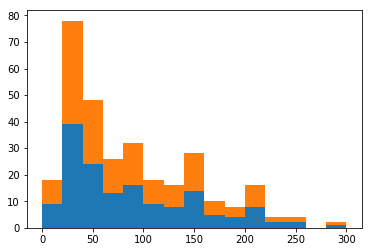

In [30]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Action'].BudgetMillions], bins = 15, stacked = 'True')
# plt.hist(movies.BudgetMillions)
plt.show()

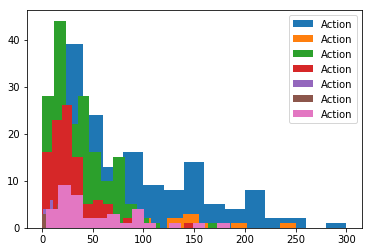

In [31]:
mylist = list()
for gen in movies.Genre.cat.categories:
    mylist.append(gen)
    plt.hist([movies[movies.Genre == gen].BudgetMillions], bins = 15, stacked=True, label = mylist)
    
    
plt.legend()
plt.show()

#Doesn't WORK...Need to create list and append to list as shown below.

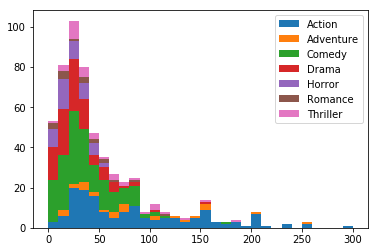

In [32]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h = plt.hist(list1, bins=30, rwidth=1, stacked=True, label=mylabels)
plt.legend()
plt.show()

In [33]:
#<<Chart 4

In [34]:
#KDE Plot

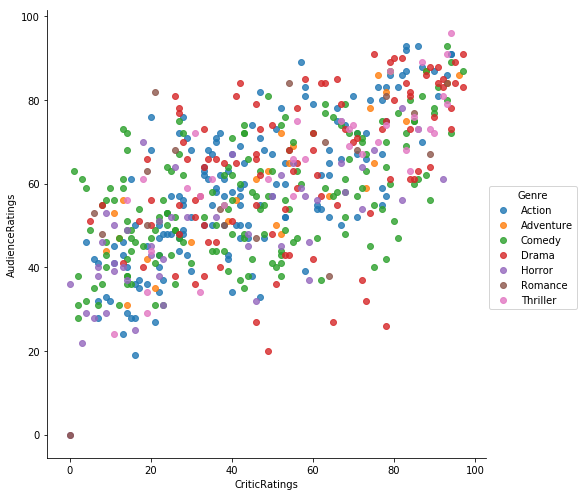

In [35]:
vis1 = sns.lmplot(data=movies, x='CriticRatings', y='AudienceRatings', \
                 fit_reg=False, hue='Genre', size=7, aspect=1)

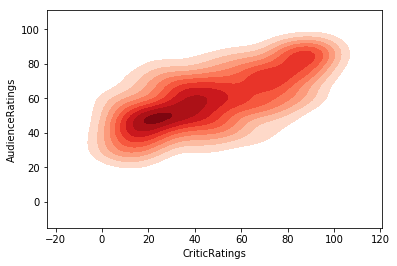

In [36]:
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds')

In [37]:
#Working with SubPlots()
sns.set_style('darkgrid')

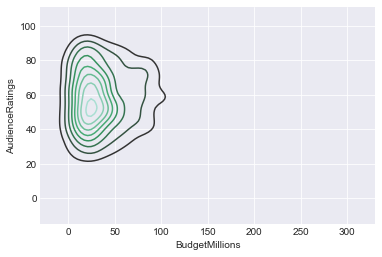

In [38]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)

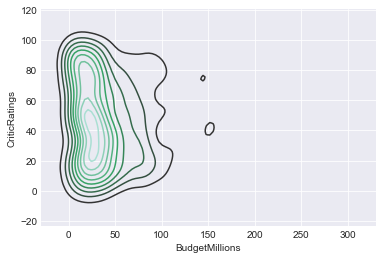

In [39]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings)

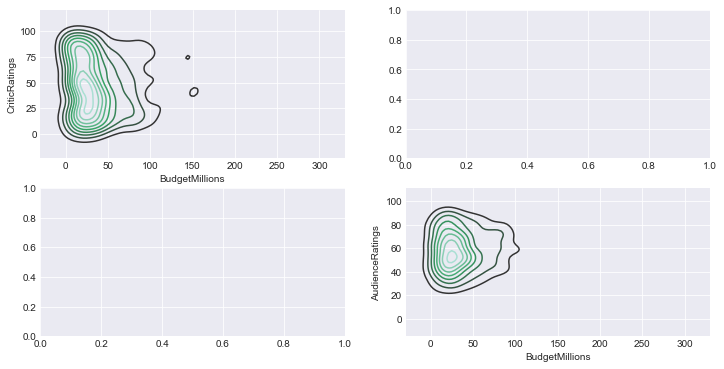

In [40]:
f, ax = plt.subplots(2,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=ax[1,1])

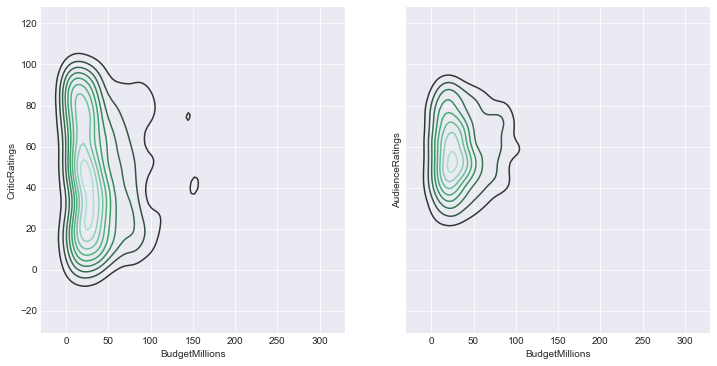

In [41]:
f, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=ax[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=ax[1])

In [42]:
#Violinplots

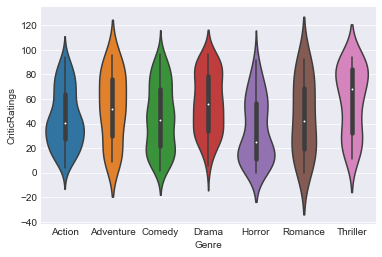

In [43]:
v1 = sns.violinplot(data=movies, x='Genre', y='CriticRatings')

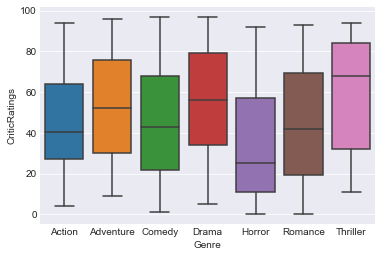

In [44]:
b1 = sns.boxplot(data=movies, x='Genre', y='CriticRatings')

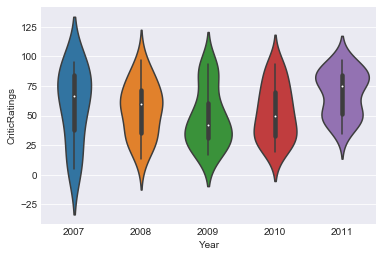

In [45]:
b1 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRatings')

In [46]:
#Creating a grid

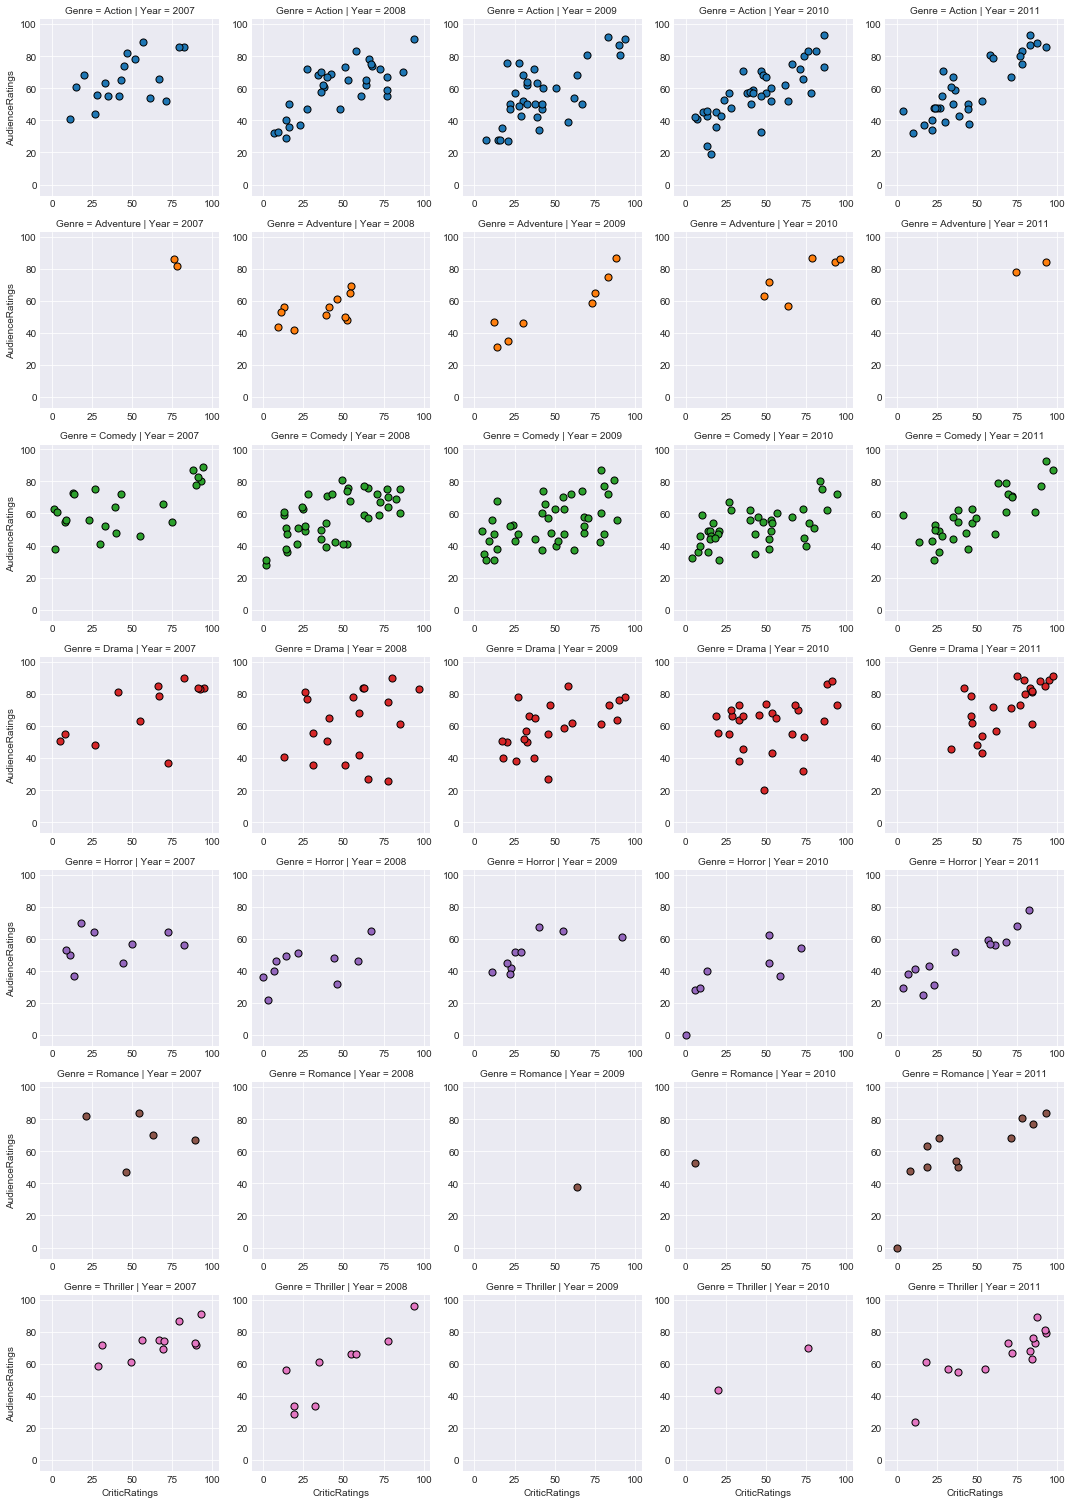

In [47]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue = 'Genre')
kws = dict(s=50, linewidth=1, edgecolor='black')
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)

TypeError: unhashable type: 'dict'

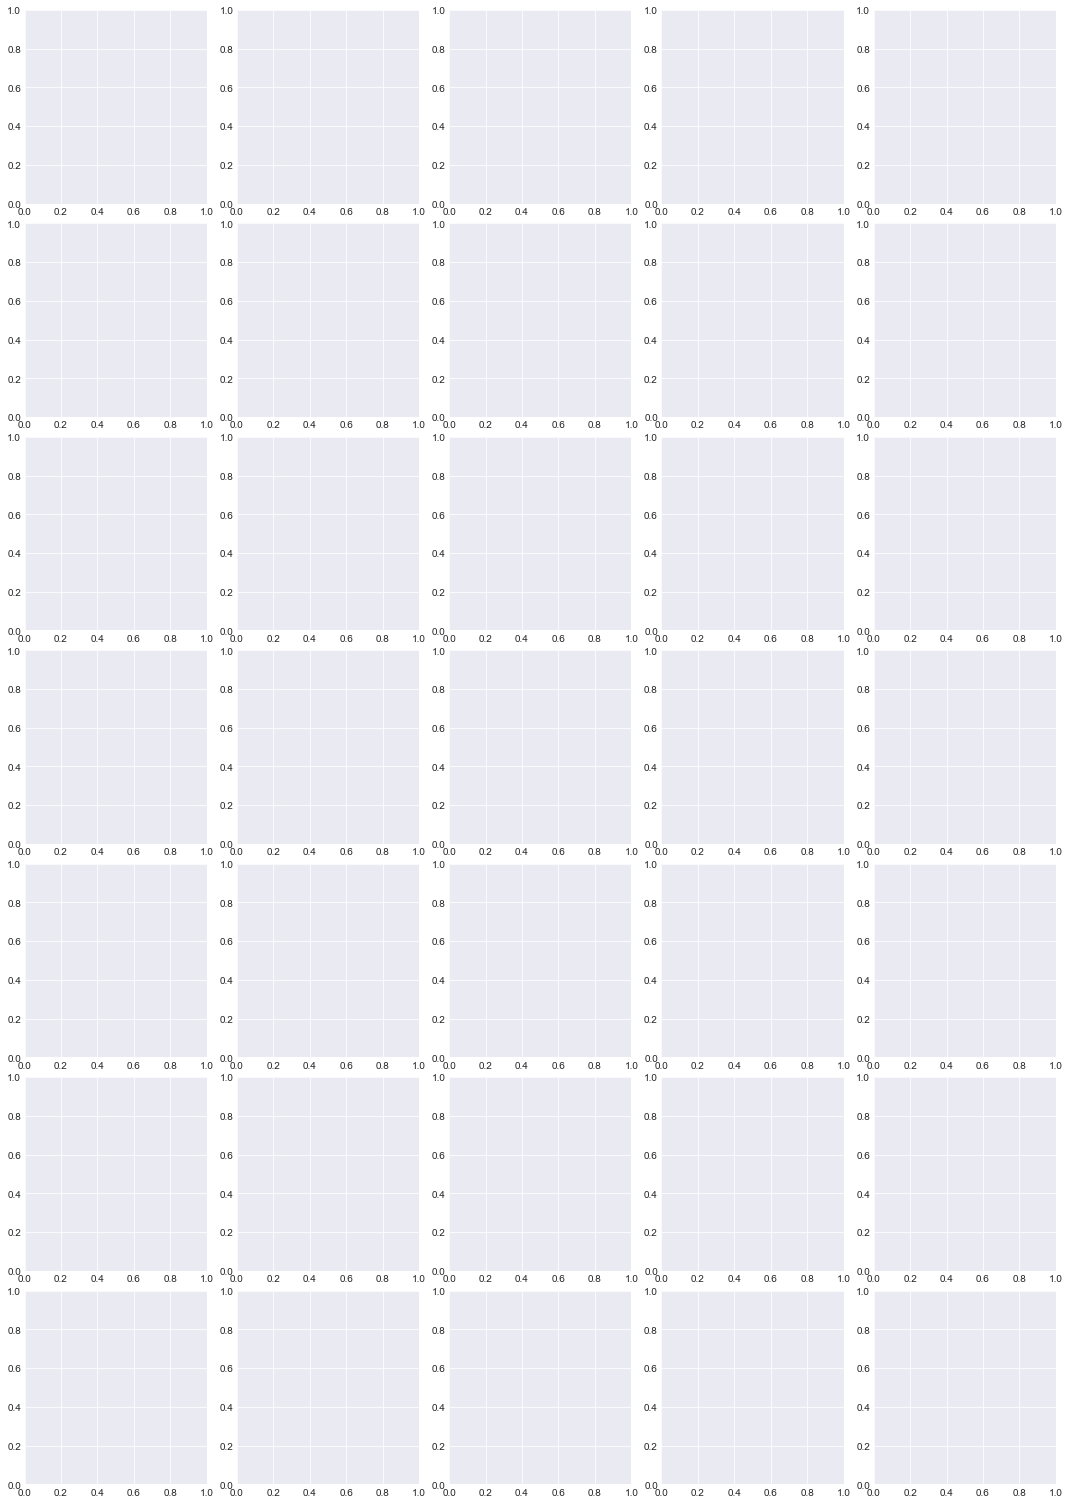

In [48]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue = 'Genre')
g = g.map(plt.hist, 'AudienceRatings', kws)

In [ ]:
#Controlling Axes and Adding Diagonals

In [ ]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue = 'Genre')
kws = dict(s=50, linewidth=1, edgecolor='black')
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)
g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='grey', ls='--')
g.add_legend()

In [ ]:
#Building a Dashboard

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('whitegrid')
f, ax = plt.subplots(2,2, figsize = (15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=ax[0,1])
b1 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRatings', ax=ax[1,0])
#ax[1,0].hist(movies.AudienceRatings, bins=15) - adding pyplots
b2 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds', ax=ax[1,1])
b2b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax=ax[1,1])
k2.set(ylim=(-20,120), xlim=(-20, 160))
plt.show()


---

In [ ]:
sns.set_style('dark', {"axes.facecolor":"black"})
f, ax = plt.subplots(2,2, figsize = (15,15))
#Plot[0,0]
k1a = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, shade=True, shade_lowest=False, cmap='inferno', ax=ax[0,0])
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, cmap='cool',ax=ax[0,0])

#Plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=ax[0,1], cmap='cool')
k2a = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='inferno', ax=ax[0,1])
#Plot[1,0]
b1 = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=ax[1,0], palette='YlOrRd')
#ax[1,0].hist(movies.AudienceRatings, bins=15) - adding pyplots

#Plot[1,1]
b2 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Blues_r', ax=ax[1,1])
b2b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='gist_gray_r', ax=ax[1,1])

k2.set(ylim=(-20,120), xlim=(-20, 160))
plt.show()

---

In [49]:
#Cleaning Up your Charts

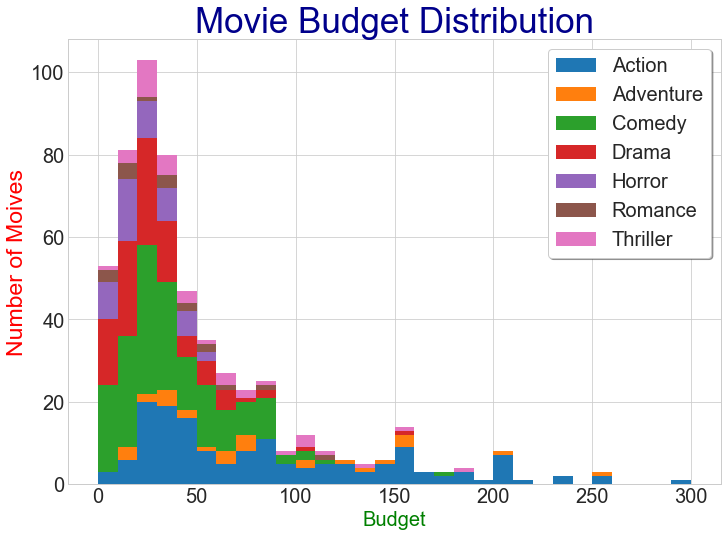

In [60]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.2)
h = plt.hist(list1, bins=30, rwidth=1, stacked=True, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=35, color='DarkBlue')
plt.ylabel('Number of Moives', fontsize=23, color='Red')
plt.xlabel('Budget', fontsize=20, color='Green')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, shadow=True, prop={'size':20})
plt.show()